### 1. 필요한 라이브러리 불러오기

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 2. 데이터 읽고 파악하기

In [2]:
# import train, test CSV 파일
train = pd.read_csv("/users/eunnyoung/work/kaggle/titanic/data/train.csv")
test = pd.read_csv("/users/eunnyoung/work/kaggle/titanic/data/test.csv")

# training 데이터 살펴보기
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hampe, Mr. Leon",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3. 데이터 분석

In [3]:
# 데이터 집합 내의 특성 목록
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
# 데이터 집합의 샘플을 보고 변수 파악
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [5]:
# 각각의 데이터 타입
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# training 데이터 집합의 요약
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hampe, Mr. Leon",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


몇 가지 추측들:
 - 총 891명의 승객 데이터가 있다.
 - 이 데이터 중 '나이'의 대략 19.8%의 값이 누락되었다. 여기서 '나이'가 생존에 매우 중요한 값이라는 것을 추측할 수 있다. 그래서 아마 이 공백을 채워야만 할 것이다.
 - 이들 중 '객실' 데이터의 대략 77.1%의 값이 누락되어 있다. 많은 특징이 누락되어 있기 때문에, 누락된 값을 채우기가 어려울 것이다. 우리는 아마 이 값을 데이터 집합에서 누락시켜야 할 것이다.
 - 'Embarked'는 상대적으로 무해해야 하는 값의 0.22%가 누락되어 있다.


In [7]:
# 다른 사용할 수 없는 값이 있는지 확인
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


위에서 언급한 누락된 값을 제외고 NaN 값이 존재하지 않음을 알 수 있다.

몇 가지 예언들:
 - 성별: 여성이 살아남을 가능성이 더 높다.
 - 형제수+배우자수/부모수+자녀수: 혼자 여행하는 사람들이 살아남을 가능성이 더 높다.
 - 나이: 어린 아이들이 살아남을 가능성이 더 높다.
 - Pclass: 사회경제 계층이 높은 사람들이 살아남을 가능성이 더 높다.

### 4. 데이터 시각화
우리의 예측이 정확한지 볼 수 있도록 데이터를 시각화하기. 

#### 성별 (Sex)

여성 생존자 비율: 74.20382165605095
남성 생존자 비율: 18.890814558058924


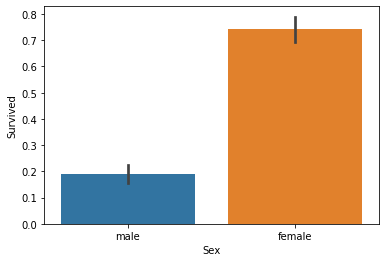

In [8]:
# 성별 별 생존자 bar plot 그리기
sns.barplot(x='Sex', y='Survived', data=train)

# print 여성 생존자 비율 vs. 남성 생존자 비율
print("여성 생존자 비율:", train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1]*100)

print("남성 생존자 비율:", train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1]*100)

앞서 말했듯이, 여성이 남성보다 생존의 기회가 매우 높았다. 성별 특성은 우리의 예측에 필수적이다.

#### Pclass

Pclass 비율 = 1생존자: 62.96296296296296
Pclass 비율 = 2생존자: 47.28260869565217
Pclass 비율 = 3생존자: 24.236252545824847


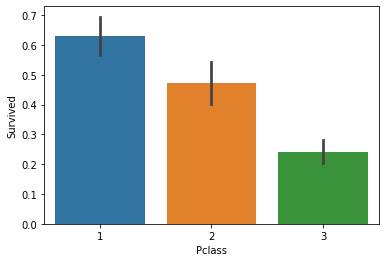

In [9]:
# Pclass 별 생존자 bar plot 그리기
sns.barplot(x='Pclass', y='Survived', data=train)

# print Pclass 생존자 비율
print("Pclass 비율 = 1생존자:", train['Survived'][train['Pclass'] == 1].value_counts(normalize = True)[1]*100)

print("Pclass 비율 = 2생존자:", train['Survived'][train['Pclass'] == 2].value_counts(normalize = True)[1]*100)

print("Pclass 비율 = 3생존자:", train['Survived'][train['Pclass'] == 3].value_counts(normalize = True)[1]*100)

예측한 대로 사회경제 계층이 높은 계층일수록 생존율이 높았다(62.9% vs. 47.3% vs. 24.2%)

#### 동반한 형제수+배우자수 (SibSp)

SibSp = 0인 생존자 비율: 34.53947368421053
SibSp = 1인 생존자 비율: 53.588516746411486
SibSp = 2인 생존자 비율: 46.42857142857143


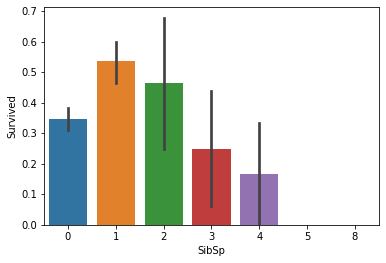

In [10]:
# SibSp 별 생존자 bar plot 그리기
sns.barplot(x='SibSp', y='Survived', data=train)

# print SibSp 별 생존자 비율
print("SibSp = 0인 생존자 비율:", train['Survived'][train['SibSp'] == 0].value_counts(normalize = True)[1]*100)

print("SibSp = 1인 생존자 비율:", train['Survived'][train['SibSp'] == 1].value_counts(normalize = True)[1]*100)

print("SibSp = 2인 생존자 비율:", train['Survived'][train['SibSp'] == 2].value_counts(normalize = True)[1]*100)

일반적으로, 더 많은 형제나 배우자를 가진 사람들이 생존할 가능성이 더 적다는 것은 분명하다. 그러나 예상과는 달리 형제나 배우자가 없는 사람은 한두 명이 사는 사람보다 생존 가능성이 적었다.(34.5% vs 53.4% vs. 46.4%)

#### 동반한 부모수+자식수 (Parch)

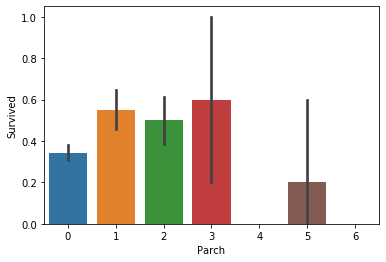

In [11]:
# Parch 별 생존자 bar plot 그리기
sns.barplot(x='Parch', y='Survived', data=train)
plt.show()

부모나 자녀가 4명 이하인 사람은 4명 이상인 사람보다 생존 가능성이 높다. 다시 말하지만, 혼자 여행하는 사람들은 1-3명의 부모나 자녀를 가진 사람들보다 살아남을 가능성이 더 적다.

#### 나이 (Age) 
★이해 안 된 부분

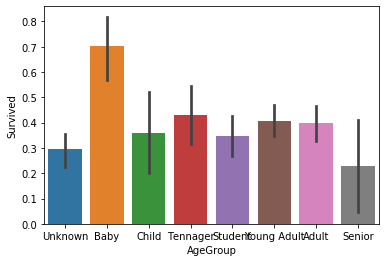

In [12]:
# 나이를 논리적으로 분류하기
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Tennager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

# 나이 별 생존자 bar plot 그리기
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.show()

아기(Baby)들은 다른 어떤 연령대보다 살아남을 가능성이 높다.

#### 객실 (Cabin) ★
나는 여기에 기록된 객실 번호를 가진 사람들이 더 높은 사회경제적 계층이고, 따라서 생존할 가능성이 더 높다고 생각한다.

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


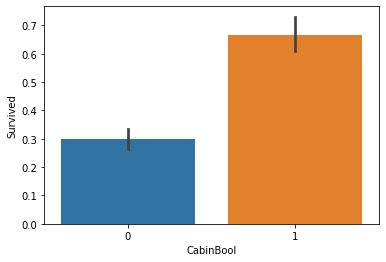

In [13]:
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

# CabinBool과 CabinBool 별 생존자 계산하기
print('Percentage of CabinBool = 1 who survived:', train['Survived'][train['CabinBool'] == 1].value_counts(normalize = True)[1]*100)

print('Percentage of CabinBool = 0 who survived:', train['Survived'][train['CabinBool'] == 0].value_counts(normalize = True)[1]*100)

# CabinBool 별 생존자 bar plot 그리기
sns.barplot(x='CabinBool', y='Survived', data=train)
plt.show()

객실 번호가 기록된 사람들은 사실 살아남을 가능성이 더 높다. (66.6% vs 29.9%)

### 5) 데이터 정리
누락된 값과 불필요한 정보를 설명하기 위해 데이터를 정리할 시간!

#### 테스트 데이터 보기

In [14]:
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


- 우리는 총 418명의 승객이 있다.
- 요금(Fare)에서 1 값이 누락됨
- 나이(Age)의 약 20.5%가 빠져있으니, 우리는 그것을 채워야 할 것이다.

#### 객실 (Cabin)

In [15]:
# Cabin을 삭제하는 것으로 시작. 왜냐하면 더 많은 유용한 정보를 얻을 수 없기 때문이다.

train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

#### 티켓 (Ticket)

In [16]:
# Ticket에서 유용한 정보를 얻을 수 없기 때문에 Ticket 또한 삭제

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

#### 승선항 (Embarked)

In [17]:
# 이제 Embarked의 누락된 값을 채워야 한다.

print('Number of people embarking in Southampton (S):')
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)

print('Number of people embarking in Cherbourg (C):')
cherbourg = train[train['Embarked'] == 'C'].shape[0]
print(cherbourg)

print('Number of people embarking in Queenstown (Q):')
queenstown = train[train['Embarked'] == 'Q'].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


대다수의 사람들이 Southampton (S)에 탑승한 것은 분명하다. 먼저 S로 누락된 값을 채우자.

In [18]:
# Embarked의 누락된 값을 S로 대체
train = train.fillna({'Embarked': 'S'})

#### 나이 (Age) ★
다음으로 Age의 누락된 값을 채운다. 더 높은 퍼센트의 가치가 누락되어 있기 때문에, (Embarked와 같이) 모든 값을 동일한 값으로 채우는 것은 비논리적일 것이다. 대신 실종된 나이를 예측할 수 있는 방법을 찾아보자.

In [19]:
# 두 데이터 집합의 결합된 그룹 생성
combine = [train, test]

# 열차 및 테스트 데이터 집합에서 각 이름의 title 추출
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
# 여러 title을 더 흔한 이름으로 대체
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [21]:
# 각 title 그룹을 숫자 값에 매핑
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


다음으로, 우리는 그들의 title에 대한 가장 일반적인 나이에서 누락된 값을 예측해 볼 것이다. ★

In [22]:
# 각 title에 대한 모드 연령 그룹으로 누락된 나이 채우기
mr_age = train[train['Title'] == 1]['AgeGroup'].mode() #Young Adult
miss_age = train[train['Title'] == 2]['AgeGroup'].mode() #Student
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode() #Adult
master_age = train[train['Title'] == 4]['AgeGroup'].mode() #Baby
royal_age = train[train['Title'] == 5]['AgeGroup'].mode() #Adult
rare_age = train[train['Title'] == 6]['AgeGroup'].mode() #Adult

age_title_mapping = {1: 'Young Adult', 2: 'Student', 3: 'Adult', 4: 'Baby', 5: 'Adult', 6: 'Adult'}

# 이 코드를 .map()를 사용하여 작동시키려고 했지만, 사용할 수 없었다.
# 나는 일단 덜 우아하고 일시적인 해결책을 내놓았다.
# train = train.fillna({'Age': train['Title'].map(age_title_mapping)})
# test = test.fillna({'Age': test['Title'].map(age_title_mapping)})

for x in range(len(train['AgeGroup'])):
    if train['AgeGroup'][x] == 'Unknown':
        train['AgeGroup'][x] = age_title_mapping[train['Title'][x]]
        
for x in range(len(test['AgeGroup'])):
    if test['AgeGroup'][x] == 'Unknown':
        test['AgeGroup'][x] = age_title_mapping[test['Title'][x]]

누락된 값을 최소한 어느 정도 정확하게 기입했으므로(실종 연령 값을 예측하는 더 나은 방법을 강구하겠다), 이제 각 연령 그룹을 수치 값으로 매핑할 때가 되었다.

In [23]:
# 각 연령 값을 숫자 값에 매핑
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

# 현재 Age를 삭제하면 변경될 수 있음
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

#### 이름 (Name)
title을 추출했으므로 이제 Name을 삭제할 수 있다.

In [24]:
# 더 이상 유용한 정보가 없으므로 Name을 삭제
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

#### 성별 (Sex)

In [25]:
# 각 성별 값을 숫자 값에 매핑
sex_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


#### 승선항 (Embarked)

In [26]:
# 각 승선항 값을 숫자 값에 매핑
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


#### 요금 (Fare) ★
test 데이터 집합에서 누락된 단일 값을 채울 뿐만 아니라 일부 논리적 그룹으로 구분해야 할 때이다.

In [27]:
# 해당 P클래스의 평균 운임을 기준으로 한 test 데이터 집합의 누락된 요금 값을 기입
for x in range(len(test['Fare'])):
    if pd.isnull(test['Fare'][x]):
        pclass = test['Pclass'][x] #Pclass = 3
        test['Fare'][x] = round(train[train['Pclass'] == pclass]['Fare'].mean(), 4)
        
# 각 요금 값을 숫자 값에 매핑
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

# Fare을 삭제
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [28]:
# train 데이터 체크
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [29]:
# test 데이터 체크
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


The code I used above is from here.